# <center>XN Project: CoverQuick Analysis in Business Performance Impact</center>

| Course | Instructor | Full Name | Date       | Term   |
|--------|------------|-----------|------------|--------|
| ALY6080 | Dr Chinthaka Pathum Dinesh, Prof Herath Gedara, Faculty Lecturer | Abhilash Dikshit, Kush Patel, Siddharth Alashi | May 24, 2023 | Spring |


## Research Questions
1. What are the three industries that the majority of CoverQuick's users apply to ?
2. Discover trends in demographics and find which industries yield the best and the worst resumes (CoverQuick provides metrics for defining a "Good" resume). 
3. Determine the approximate age range and experience level.
4. Determine trends in experience and skills for these target users.

# Coverquick No Job Description Dataset Analysis:

In [163]:
#!pip install tabulate
#!pip install pandas
#!pip install numpy
#!pip install display
#!pip install pycountry
#!pip install WordCloud
#!pip install pycountry-convert


In [164]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import json
from IPython.display import display
import matplotlib.pyplot as plt
import pycountry
from wordcloud import WordCloud

In [165]:
# Reset the display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

# # Set the display options
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [166]:
print('\033[1mCoverQuick No Job Description Dataset:\n' + '='*38 + '\033[0m')

# Read in the CSV file
path_no_jd = '~/GitProjects/Datasets/coverquick_nojob_dscrptn.csv'
df_no_jd = pd.read_csv(path_no_jd)

print('\nDisplay Raw Dataset:\n')
display(df_no_jd)

# Display basic information about the dataset
table = [['Type', 'Length', 'Shape'], [type(df_no_jd), len(df_no_jd), df_no_jd.shape]]

print('\nDisplay Type, Length, Shape about the dataset:\n')
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

# Display the data types of each column
print('\nDisplay datatypes of respective columns in dataset:\n')
print(tabulate(df_no_jd.dtypes.to_frame().T, headers='keys', tablefmt='fancy_grid'))

# Get max and min length and their index values of all three columns
id_col = df_no_jd['id']
max_id_length = id_col.str.len().max()
min_id_length = id_col.str.len().min()

content_col = df_no_jd['content']
max_content_length = content_col.str.len().max()
min_content_length = content_col.str.len().min()

# Count the number of NaN values in each column
nan_count_id = df_no_jd['id'].isna().sum()
nan_count_content = df_no_jd['content'].isna().sum()

table = [
    ["Column", "Max Length", "Min Length","NA Count"],
    ["id", max_id_length, min_id_length, nan_count_id],
    ["content", max_content_length, min_content_length, nan_count_content]
]
print('\nShowing max, min length and NA values:\n')
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))



CoverQuick No Job Description Dataset:

Display Raw Dataset:



,id,content
0,clezbskz2000ryi2yj9sgidax,"{""awards"": {""awards"": []}, ""header"": {""role"": ..."
1,clezeac8k001myg2u6yph9yz0,"{""awards"": {""awards"": []}, ""header"": {""role"": ..."
2,clezh9pxu0185yp2yo6ztscpf,"{""awards"": {""awards"": []}, ""header"": {""role"": ..."
3,clf06bf5b014dx22ur1bph3sd,"{""awards"": {""awards"": []}, ""header"": {""role"": ..."
4,clezdavhy000eyg2uh55ycnb4,"{""awards"": {""awards"": []}, ""header"": {""role"": ..."
...,...,...
13193,clbmqeb0p00bowy50puy0zh47,"{""awards"": {""awards"": []}, ""header"": {""role"": ..."
13194,cld9mmcjj004mx32l3q1bn6ju,"{""awards"": {""awards"": []}, ""header"": {""role"": ..."
13195,cld8csfqd002yyc2m1l7vqsuv,"{""awards"": {""awards"": []}, ""header"": {""role"": ..."
13196,clelqs1nd0002x12vg9vjumyg,"{""awards"": {""awards"": []}, ""header"": {""role"": ..."



Display Type, Length, Shape about the dataset:

╒═══════════════════════════════════════╤══════════╤════════════╕
│ Type                                  │   Length │ Shape      │
╞═══════════════════════════════════════╪══════════╪════════════╡
│ <class 'pandas.core.frame.DataFrame'> │    13198 │ (13198, 2) │
╘═══════════════════════════════════════╧══════════╧════════════╛

Display datatypes of respective columns in dataset:

╒════╤════════╤═══════════╕
│    │ id     │ content   │
╞════╪════════╪═══════════╡
│  0 │ object │ object    │
╘════╧════════╧═══════════╛

Showing max, min length and NA values:

╒══════════╤══════════════╤══════════════╤════════════╕
│ Column   │   Max Length │   Min Length │   NA Count │
╞══════════╪══════════════╪══════════════╪════════════╡
│ id       │           25 │           25 │          0 │
├──────────┼──────────────┼──────────────┼────────────┤
│ content  │        30743 │          484 │          0 │
╘══════════╧══════════════╧══════════════╧════════

In [167]:
print('\n\033[1mContent Column Split:\n' + '='*21 + '\033[0m')


# Convert the content column from JSON to a dictionary
df_no_jd['content'] = df_no_jd['content'].apply(lambda x: json.loads(x))

# Extract keys and values from the content column
keys = []
values = []

for row in df_no_jd['content']:
    for k, v in row.items():
        keys.append(k)
        values.append(v)
        
# Create a new DataFrame with the extracted keys and values
new_df = pd.DataFrame({'content': keys, 'content_values': values})

# Display the new DataFrame
print('\nDisplay the Content DataFrame:\n')
display(new_df)

# Convert the content column from JSON to a dictionary with formatted values
df_no_jd['content'] = df_no_jd['content'].apply(lambda x: json.loads(json.dumps(x, indent=4)))

# Normalize the JSON data and combine into a single DataFrame
new_no_jd = pd.json_normalize(df_no_jd['content'])

# Rename the columns to be more descriptive
new_no_jd = new_no_jd.rename(columns={
    'awards.awards': 'awards',
    'header.role': 'role',
    'header.contact.city': 'city',
    'header.contact.state': 'state',
    'header.contact.country': 'country',
    'skills.skills': 'skills',
    'summary.text': 'summary',
    'projects.projects': 'projects',
    'education.education': 'education',
    'volunteer.volunteer': 'volunteer',
    'experience.experience': 'experience',
    'references.references': 'references',
    'publications.publications': 'publications', 
    'certifications.certifications':'certifications',
    'accomplishments.text':'accomplishments',
    'accomplishments.visible':'accomplishments_visible'
})

display(new_no_jd)


Content Column Split:

Display the Content DataFrame:



,content,content_values
0,awards,{'awards': []}
1,header,"{'role': '', 'contact': {'city': 'Algiers / Hu..."
2,skills,{'skills': []}
3,summary,"{'text': '', 'visible': True}"
4,projects,{'projects': []}
...,...,...
158371,experience,{'experience': [{'title': 'Energy and Sustaina...
158372,references,{'references': []}
158373,publications,{'publications': []}
158374,certifications,{'certifications': []}


,awards,role,city,state,country,skills,summary,summary.visible,projects,education,volunteer,experience,references,publications,certifications,accomplishments,accomplishments_visible
0,[],,Algiers / Hussein Dey,Algiers,Algeria,[],,True,[],[],[],[],[],[],[],,True
1,[],,Kisii,,Kenya,[{'section': 'Staff leadership and supervision...,Organized and dependable candidate successfull...,True,[],"[{'GPA': '', 'minor': 'Computer networking ', ...","[{'title': 'ICT assistant ', 'endDate': 'Decem...","[{'title': 'Intern ', 'company': 'Ministry of ...",[],[],[],,True
2,[],,Nairobi,Nairobi,Kenya,[],Taking on challenging opportunities to meet my...,True,[],"[{'GPA': 'Pass', 'minor': 'Certificate in Auto...",[],"[{'title': 'Admin in charge', 'company': 'Plan...",[],[],"[{'name': 'First Aid at Work', 'issuer': 'St J...",,True
3,[],,NAIROBI,,KENYA,"[{'section': 'Proficient in ArcGIS Desktop, Kn...",Ambitious student eager to contribute to team ...,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'SURVEY OF KENYA Attachee', 'compan...",[],[],[],,True
4,[],,Machakos,Machakos,Kenya,"[{'section': '', 'visible': True, 'sectionName...",Quality Control Analyst with 1 year of experie...,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'Quality Control Analyst', 'company...",[],[],[{'name': 'Certificate in Computer Application...,,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,[],,,,,"[{'section': 'Microsoft Office, Collaboration,...",,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'Counselor', 'company': 'Camp Micah...",[],[],[],,True
13194,[],,NAPERVILLE,IL,United States,"[{'section': 'Customer service, adaptable, str...",Passionate business student with 8+ years of e...,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'Rehabilitation Technician', 'compa...",[],[],[],,True
13195,[],,Orlando,Florida,United States,"[{'section': 'Strong verbal, written and telep...",Knowledgeable Customer Service Agent with driv...,True,[],"[{'GPA': '3.4', 'minor': '', 'awards': '', 'sc...",[],"[{'title': 'Server', 'company': 'Sonny's', 'en...",[],[],[],,True
13196,[],,ALBERTA BEACH,Alberta,Canada,[],,True,[],[],[],[],[],[],[],,True


In [168]:
print('\n\033[1mCombine "id" column from "df_no_jd" dataframe with "new_no_jd" dataframe:\n' + '='*73 + '\033[0m')

# Extract the first column of df_no_jd
col1 = df_no_jd.iloc[:, 0]

# Concatenate the first column of df_no_jd with df_no_jd
new_df = pd.concat([col1, new_no_jd], axis=1)

# Convert column names to uppercase
new_df.columns = new_df.columns.str.upper()

# Convert all columns to lowercase
new_df = new_df.applymap(lambda x: x.lower() if type(x) == str else x)

display(new_df)



Combine "id" column from "df_no_jd" dataframe with "new_no_jd" dataframe:


,ID,AWARDS,ROLE,CITY,STATE,COUNTRY,SKILLS,SUMMARY,SUMMARY.VISIBLE,PROJECTS,EDUCATION,VOLUNTEER,EXPERIENCE,REFERENCES,PUBLICATIONS,CERTIFICATIONS,ACCOMPLISHMENTS,ACCOMPLISHMENTS_VISIBLE
0,clezbskz2000ryi2yj9sgidax,[],,algiers / hussein dey,algiers,algeria,[],,True,[],[],[],[],[],[],[],,True
1,clezeac8k001myg2u6yph9yz0,[],,kisii,,kenya,[{'section': 'Staff leadership and supervision...,organized and dependable candidate successfull...,True,[],"[{'GPA': '', 'minor': 'Computer networking ', ...","[{'title': 'ICT assistant ', 'endDate': 'Decem...","[{'title': 'Intern ', 'company': 'Ministry of ...",[],[],[],,True
2,clezh9pxu0185yp2yo6ztscpf,[],,nairobi,nairobi,kenya,[],taking on challenging opportunities to meet my...,True,[],"[{'GPA': 'Pass', 'minor': 'Certificate in Auto...",[],"[{'title': 'Admin in charge', 'company': 'Plan...",[],[],"[{'name': 'First Aid at Work', 'issuer': 'St J...",,True
3,clf06bf5b014dx22ur1bph3sd,[],,nairobi,,kenya,"[{'section': 'Proficient in ArcGIS Desktop, Kn...",ambitious student eager to contribute to team ...,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'SURVEY OF KENYA Attachee', 'compan...",[],[],[],,True
4,clezdavhy000eyg2uh55ycnb4,[],,machakos,machakos,kenya,"[{'section': '', 'visible': True, 'sectionName...",quality control analyst with 1 year of experie...,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'Quality Control Analyst', 'company...",[],[],[{'name': 'Certificate in Computer Application...,,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,clbmqeb0p00bowy50puy0zh47,[],,,,,"[{'section': 'Microsoft Office, Collaboration,...",,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'Counselor', 'company': 'Camp Micah...",[],[],[],,True
13194,cld9mmcjj004mx32l3q1bn6ju,[],,naperville,il,united states,"[{'section': 'Customer service, adaptable, str...",passionate business student with 8+ years of e...,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'Rehabilitation Technician', 'compa...",[],[],[],,True
13195,cld8csfqd002yyc2m1l7vqsuv,[],,orlando,florida,united states,"[{'section': 'Strong verbal, written and telep...",knowledgeable customer service agent with driv...,True,[],"[{'GPA': '3.4', 'minor': '', 'awards': '', 'sc...",[],"[{'title': 'Server', 'company': 'Sonny's', 'en...",[],[],[],,True
13196,clelqs1nd0002x12vg9vjumyg,[],,alberta beach,alberta,canada,[],,True,[],[],[],[],[],[],[],,True


In [169]:
print('\n\033[1mFormat Column "COUNTRY" and add Column "COUNTRY_CODE":\n' + '='*55 + '\033[0m')
df_country = new_df

# Define a function to map the country names to alpha_2 codes
def get_alpha_2(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_2
    except AttributeError:
        return None

# Apply the function to the COUNTRY column and create a new column COUNTRY_CODE
df_country['COUNTRY_CODE'] = df_country['COUNTRY'].apply(get_alpha_2)

display(df_country)



Format Column "COUNTRY" and add Column "COUNTRY_CODE":


,ID,AWARDS,ROLE,CITY,STATE,COUNTRY,SKILLS,SUMMARY,SUMMARY.VISIBLE,PROJECTS,EDUCATION,VOLUNTEER,EXPERIENCE,REFERENCES,PUBLICATIONS,CERTIFICATIONS,ACCOMPLISHMENTS,ACCOMPLISHMENTS_VISIBLE,COUNTRY_CODE
0,clezbskz2000ryi2yj9sgidax,[],,algiers / hussein dey,algiers,algeria,[],,True,[],[],[],[],[],[],[],,True,DZ
1,clezeac8k001myg2u6yph9yz0,[],,kisii,,kenya,[{'section': 'Staff leadership and supervision...,organized and dependable candidate successfull...,True,[],"[{'GPA': '', 'minor': 'Computer networking ', ...","[{'title': 'ICT assistant ', 'endDate': 'Decem...","[{'title': 'Intern ', 'company': 'Ministry of ...",[],[],[],,True,KE
2,clezh9pxu0185yp2yo6ztscpf,[],,nairobi,nairobi,kenya,[],taking on challenging opportunities to meet my...,True,[],"[{'GPA': 'Pass', 'minor': 'Certificate in Auto...",[],"[{'title': 'Admin in charge', 'company': 'Plan...",[],[],"[{'name': 'First Aid at Work', 'issuer': 'St J...",,True,KE
3,clf06bf5b014dx22ur1bph3sd,[],,nairobi,,kenya,"[{'section': 'Proficient in ArcGIS Desktop, Kn...",ambitious student eager to contribute to team ...,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'SURVEY OF KENYA Attachee', 'compan...",[],[],[],,True,KE
4,clezdavhy000eyg2uh55ycnb4,[],,machakos,machakos,kenya,"[{'section': '', 'visible': True, 'sectionName...",quality control analyst with 1 year of experie...,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'Quality Control Analyst', 'company...",[],[],[{'name': 'Certificate in Computer Application...,,True,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,clbmqeb0p00bowy50puy0zh47,[],,,,,"[{'section': 'Microsoft Office, Collaboration,...",,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'Counselor', 'company': 'Camp Micah...",[],[],[],,True,None
13194,cld9mmcjj004mx32l3q1bn6ju,[],,naperville,il,united states,"[{'section': 'Customer service, adaptable, str...",passionate business student with 8+ years of e...,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'Rehabilitation Technician', 'compa...",[],[],[],,True,US
13195,cld8csfqd002yyc2m1l7vqsuv,[],,orlando,florida,united states,"[{'section': 'Strong verbal, written and telep...",knowledgeable customer service agent with driv...,True,[],"[{'GPA': '3.4', 'minor': '', 'awards': '', 'sc...",[],"[{'title': 'Server', 'company': 'Sonny's', 'en...",[],[],[],,True,US
13196,clelqs1nd0002x12vg9vjumyg,[],,alberta beach,alberta,canada,[],,True,[],[],[],[],[],[],[],,True,CA


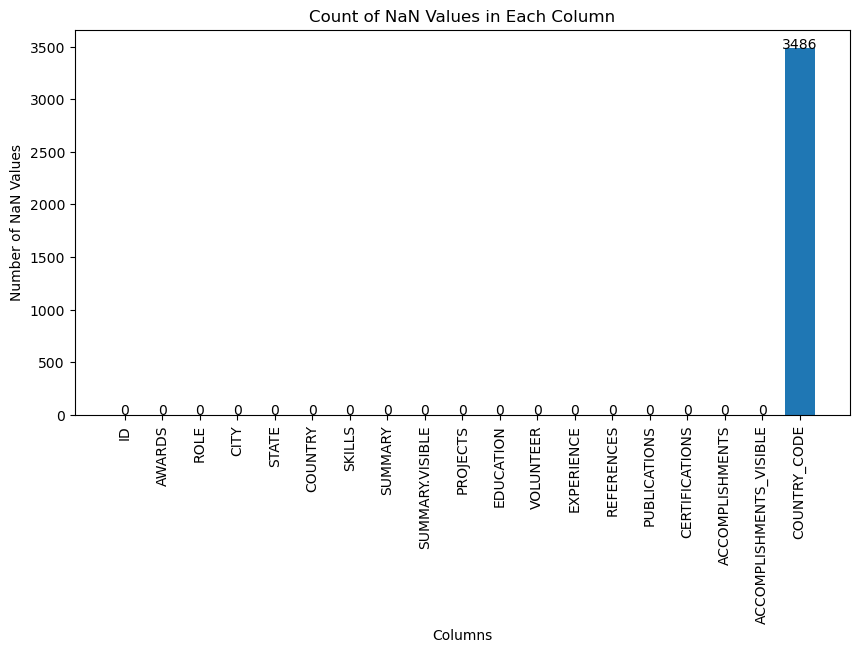

In [170]:
# Count the number of NaN values in each column
nan_counts = df_country.isna().sum()

# Create a bar chart to visualize the missing data
plt.figure(figsize=(10,5))
plt.bar(nan_counts.index, nan_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.title('Count of NaN Values in Each Column')

# Add counts to the chart
for i, v in enumerate(nan_counts.values):
    plt.text(i, v, str(v), color='black', ha='center')
    
plt.show()

In [171]:
print('\n\033[1mCOUNTRY_CODE Non-Null and Null Count:\n' + '='*37 + '\033[0m')
# Count the total number of values in COUNTRY_CODE column
total_count = len(df_country['COUNTRY_CODE'])

# Count the number of non-null values in COUNTRY_CODE column
non_null_count = df_country['COUNTRY_CODE'].count()

# Count the number of null values in COUNTRY_CODE column
null_count = df_country['COUNTRY_CODE'].isna().sum()

data = {'Total Count': [total_count], 'Non-Null Count': [non_null_count], 'Null Count': [null_count]}
df_counts = pd.DataFrame(data)
print(df_counts)



COUNTRY_CODE Non-Null and Null Count:
   Total Count  Non-Null Count  Null Count
0        13198            9712        3486


In [172]:
# # get columns where values are NaN in column "COUNTRY_CODE"

# na_mask = pd.isna(df_country['COUNTRY_CODE'])
# na_rows = df_country[na_mask]

# # Select all columns from the resulting rows
# na_columns = na_rows.loc[:, :]

# display(na_columns)

In [173]:

print('\n\033[1mReplace None values in COUNTRY_CODE column with corresponding country codes:\n' + '='*78 + '\033[0m')
for idx, row in df_country.iterrows():
    if pd.isna(row['COUNTRY_CODE']):
        try:
            query = row['COUNTRY'][:3]
            if query and query[0].isdigit():
                country_code = 'OT'
            else:
                country_code = pycountry.countries.search_fuzzy(query)[0].alpha_2
        except LookupError as e:
            if str(e) == 'u.a':
                country_code = 'AE'
            elif str(e) == 'uae':
                country_code = 'AE'
            elif str(e) == 'u.a.e':
                country_code = 'AE'
            elif str(e) == 'usa':
                country_code = 'US'
            elif str(e) == 'namibia':
                country_code = 'NA' 
            elif str(e) == 'tanzania':
                country_code = 'TZ'
            elif str(e) == 'lesotho':
                country_code = 'LS' 
            elif str(e) in ['tbt','бел','рос','fgj','укр']:
                country_code = 'OT'
            else:
                #raise e
                country_code = 'OT'
        df_country.at[idx, 'COUNTRY_CODE'] = country_code

# Display the updated dataframe
display(df_country)



Replace None values in COUNTRY_CODE column with corresponding country codes:


,ID,AWARDS,ROLE,CITY,STATE,COUNTRY,SKILLS,SUMMARY,SUMMARY.VISIBLE,PROJECTS,EDUCATION,VOLUNTEER,EXPERIENCE,REFERENCES,PUBLICATIONS,CERTIFICATIONS,ACCOMPLISHMENTS,ACCOMPLISHMENTS_VISIBLE,COUNTRY_CODE
0,clezbskz2000ryi2yj9sgidax,[],,algiers / hussein dey,algiers,algeria,[],,True,[],[],[],[],[],[],[],,True,DZ
1,clezeac8k001myg2u6yph9yz0,[],,kisii,,kenya,[{'section': 'Staff leadership and supervision...,organized and dependable candidate successfull...,True,[],"[{'GPA': '', 'minor': 'Computer networking ', ...","[{'title': 'ICT assistant ', 'endDate': 'Decem...","[{'title': 'Intern ', 'company': 'Ministry of ...",[],[],[],,True,KE
2,clezh9pxu0185yp2yo6ztscpf,[],,nairobi,nairobi,kenya,[],taking on challenging opportunities to meet my...,True,[],"[{'GPA': 'Pass', 'minor': 'Certificate in Auto...",[],"[{'title': 'Admin in charge', 'company': 'Plan...",[],[],"[{'name': 'First Aid at Work', 'issuer': 'St J...",,True,KE
3,clf06bf5b014dx22ur1bph3sd,[],,nairobi,,kenya,"[{'section': 'Proficient in ArcGIS Desktop, Kn...",ambitious student eager to contribute to team ...,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'SURVEY OF KENYA Attachee', 'compan...",[],[],[],,True,KE
4,clezdavhy000eyg2uh55ycnb4,[],,machakos,machakos,kenya,"[{'section': '', 'visible': True, 'sectionName...",quality control analyst with 1 year of experie...,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'Quality Control Analyst', 'company...",[],[],[{'name': 'Certificate in Computer Application...,,True,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,clbmqeb0p00bowy50puy0zh47,[],,,,,"[{'section': 'Microsoft Office, Collaboration,...",,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'Counselor', 'company': 'Camp Micah...",[],[],[],,True,GB
13194,cld9mmcjj004mx32l3q1bn6ju,[],,naperville,il,united states,"[{'section': 'Customer service, adaptable, str...",passionate business student with 8+ years of e...,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'Rehabilitation Technician', 'compa...",[],[],[],,True,US
13195,cld8csfqd002yyc2m1l7vqsuv,[],,orlando,florida,united states,"[{'section': 'Strong verbal, written and telep...",knowledgeable customer service agent with driv...,True,[],"[{'GPA': '3.4', 'minor': '', 'awards': '', 'sc...",[],"[{'title': 'Server', 'company': 'Sonny's', 'en...",[],[],[],,True,US
13196,clelqs1nd0002x12vg9vjumyg,[],,alberta beach,alberta,canada,[],,True,[],[],[],[],[],[],[],,True,CA


In [174]:
print('\n\033[1mCOUNTRY_CODE Non-Null and Null Count:\n' + '='*37 + '\033[0m')
# Count the total number of values in COUNTRY_CODE column
total_count = len(df_country['COUNTRY_CODE'])

# Count the number of non-null values in COUNTRY_CODE column
non_null_count = df_country['COUNTRY_CODE'].count()

# Count the number of null values in COUNTRY_CODE column
null_count = df_country['COUNTRY_CODE'].isna().sum()

data = {'Total Count': [total_count], 'Non-Null Count': [non_null_count], 'Null Count': [null_count]}
df_counts = pd.DataFrame(data)
print(df_counts)



COUNTRY_CODE Non-Null and Null Count:
   Total Count  Non-Null Count  Null Count
0        13198           13198           0


In [175]:
# # Count the number of NaN values in each column
# nan_counts = df_country.isna().sum()

# # Create a bar chart to visualize the missing data
# plt.figure(figsize=(10,5))
# plt.bar(nan_counts.index, nan_counts.values)
# plt.xticks(rotation=90)
# plt.xlabel('Columns')
# plt.ylabel('Number of NaN Values')
# plt.title('Count of NaN Values in Each Column')

# # Add counts to the chart
# for i, v in enumerate(nan_counts.values):
#     plt.text(i, v, str(v), color='black', ha='center')
    
# plt.show()

NOTE: NO NULL VALUES IN COUNTRY CODE WHICH IS A GOOD THING

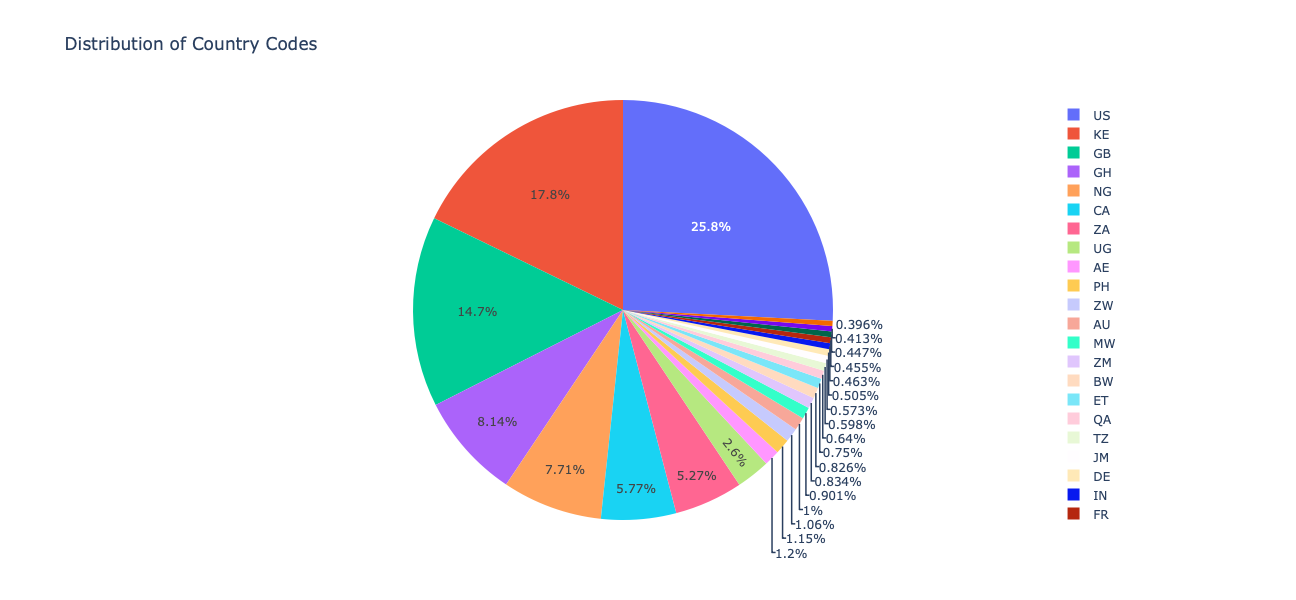

In [176]:
import plotly.graph_objects as go

# Calculate value counts of COUNTRY_CODE
country_counts = df_country['COUNTRY_CODE'].value_counts()

# Calculate cumulative percentage
cum_perc = country_counts.cumsum() / country_counts.sum()

# Filter countries to only includes countries where the cumulative percentage is less than 20%.
top_countries = country_counts[cum_perc <= 0.9]

# Create a pie chart with distribution
fig = go.Figure(data=[go.Pie(labels=top_countries.index, values=top_countries.values)])

# Create a pie chart
# fig, ax = plt.subplots()
# ax.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%')
# ax.set_title('Distribution of Country Codes')

# Set hover information to display count
fig.update_traces(hoverinfo='label+value')

# Set hover template to display count
fig.update_layout(hoverlabel=dict(
    bgcolor="white",
    font_size=12,
    font_family="Arial",
    bordercolor="black"
))

# Set title
fig.update_layout(title='Distribution of Country Codes', autosize=False, width=800, height=600)

# Show the figure
fig.show()


In [177]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

def plot_job_candidates_per_city(country_code):
    # Filter the data to include only the specified country code
    df_country = new_df[new_df['COUNTRY_CODE'] == country_code]
    
    # Get the counts of job candidates per city
    city_counts = df_country['CITY'].value_counts()
    
    # Filter the counts to include only those greater than 50
    city_counts = city_counts[city_counts > 10]
    
    # Sort the counts in descending order
    city_counts = city_counts.sort_values(ascending=False)
    
    # Plot the bar chart
    num_bars = len(city_counts)
    colors = plt.cm.Set1(np.linspace(0, 1, num_bars))
    
    plt.figure(figsize=(12, 6))
    plt.bar(city_counts.index, city_counts.values, color=colors)
    plt.title(f'Number of Candidates per City in {country_code}')
    plt.xlabel('City')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    
    # Add counts to the chart
    for i, v in enumerate(city_counts.values):
        plt.text(i, v, str(v), color='black', ha='center')
        
    plt.show()

# Get the unique country codes sorted in alphabetical order
sorted_country_codes = sorted(new_df['COUNTRY_CODE'].unique())

# Dropdown menu for country selection
country_dropdown = widgets.Dropdown(
    options=sorted_country_codes,
    value=sorted_country_codes[0],
    description='Country:',
    layout=widgets.Layout(width='200px')
)

# Use interact to dynamically update the chart based on the selected country
interact(plot_job_candidates_per_city, country_code=country_dropdown)


interactive(children=(Dropdown(description='Country:', layout=Layout(width='200px'), options=('AE', 'AF', 'AG'…

<function __main__.plot_job_candidates_per_city(country_code)>

#### Generate word cloud image for STATES:

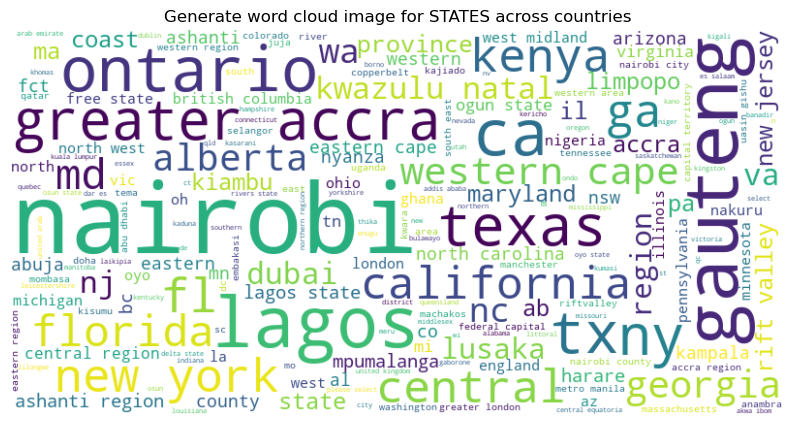

In [178]:
# Combine all text data into a single string
text_data = " ".join(df_country['STATE'].astype(str).tolist())

# Generate word cloud image
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(text_data)

# Display the generated image:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Generate word cloud image for STATES across countries')
plt.show()


### SKILLS COLUMN SPLIT

In [179]:
# SKILLS COLUMN SPLIT

print('\033[1mSkills Column Split:\n' + '='*21 + '\033[0m')

skills_list = []

for index, row in df_country.iterrows():
    skills_dicts = {}
    for dictionary in row['SKILLS']:
        for k, v in dictionary.items():
            skills_dicts[k] = v
    skills_list.append(skills_dicts)

df_skills = pd.DataFrame(skills_list)
display(df_skills)


Skills Column Split:


,section,visible,sectionName
0,NaN,NaN,NaN
1,Staff leadership and supervision\nHelp desk op...,True,Organizational and technical skills
2,NaN,NaN,NaN
3,"Proficient in ArcGIS Desktop, Knowledge of Arc...",True,SOFTWARES
4,,True,
...,...,...,...
13193,"Microsoft Office, Collaboration, Child Develop...",True,Skills
13194,"Microsoft Office, LIMS (Laboratory Information...",True,Computer
13195,Able to adjust quickly and efficiently to new ...,True,Adaptable
13196,NaN,NaN,NaN


In [180]:
# Drop the "visible" column
df_skills = df_skills.drop("visible", axis=1)

# Rename the columns
df_skills = df_skills.rename(columns={"section": "SKILL_DESCRIPTION", "sectionName": "SKILL"})

# Display the updated DataFrame
display(df_skills)


,SKILL_DESCRIPTION,SKILL
0,NaN,NaN
1,Staff leadership and supervision\nHelp desk op...,Organizational and technical skills
2,NaN,NaN
3,"Proficient in ArcGIS Desktop, Knowledge of Arc...",SOFTWARES
4,,
...,...,...
13193,"Microsoft Office, Collaboration, Child Develop...",Skills
13194,"Microsoft Office, LIMS (Laboratory Information...",Computer
13195,Able to adjust quickly and efficiently to new ...,Adaptable
13196,NaN,NaN


In [181]:
# Combine the DataFrames
df_combined = pd.concat([df_country, df_skills], axis=1)

# Drop the specified columns
df_combined = df_combined.drop(['COUNTRY', 'SKILLS', 'SUMMARY.VISIBLE', 'ACCOMPLISHMENTS_VISIBLE'], axis=1)

# Display the updated DataFrame
display(df_combined)


,ID,AWARDS,ROLE,CITY,STATE,SUMMARY,PROJECTS,EDUCATION,VOLUNTEER,EXPERIENCE,REFERENCES,PUBLICATIONS,CERTIFICATIONS,ACCOMPLISHMENTS,COUNTRY_CODE,SKILL_DESCRIPTION,SKILL
0,clezbskz2000ryi2yj9sgidax,[],,algiers / hussein dey,algiers,,[],[],[],[],[],[],[],,DZ,NaN,NaN
1,clezeac8k001myg2u6yph9yz0,[],,kisii,,organized and dependable candidate successfull...,[],"[{'GPA': '', 'minor': 'Computer networking ', ...","[{'title': 'ICT assistant ', 'endDate': 'Decem...","[{'title': 'Intern ', 'company': 'Ministry of ...",[],[],[],,KE,Staff leadership and supervision\nHelp desk op...,Organizational and technical skills
2,clezh9pxu0185yp2yo6ztscpf,[],,nairobi,nairobi,taking on challenging opportunities to meet my...,[],"[{'GPA': 'Pass', 'minor': 'Certificate in Auto...",[],"[{'title': 'Admin in charge', 'company': 'Plan...",[],[],"[{'name': 'First Aid at Work', 'issuer': 'St J...",,KE,NaN,NaN
3,clf06bf5b014dx22ur1bph3sd,[],,nairobi,,ambitious student eager to contribute to team ...,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'SURVEY OF KENYA Attachee', 'compan...",[],[],[],,KE,"Proficient in ArcGIS Desktop, Knowledge of Arc...",SOFTWARES
4,clezdavhy000eyg2uh55ycnb4,[],,machakos,machakos,quality control analyst with 1 year of experie...,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'Quality Control Analyst', 'company...",[],[],[{'name': 'Certificate in Computer Application...,,KE,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,clbmqeb0p00bowy50puy0zh47,[],,,,,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'Counselor', 'company': 'Camp Micah...",[],[],[],,GB,"Microsoft Office, Collaboration, Child Develop...",Skills
13194,cld9mmcjj004mx32l3q1bn6ju,[],,naperville,il,passionate business student with 8+ years of e...,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'Rehabilitation Technician', 'compa...",[],[],[],,US,"Microsoft Office, LIMS (Laboratory Information...",Computer
13195,cld8csfqd002yyc2m1l7vqsuv,[],,orlando,florida,knowledgeable customer service agent with driv...,[],"[{'GPA': '3.4', 'minor': '', 'awards': '', 'sc...",[],"[{'title': 'Server', 'company': 'Sonny's', 'en...",[],[],[],,US,Able to adjust quickly and efficiently to new ...,Adaptable
13196,clelqs1nd0002x12vg9vjumyg,[],,alberta beach,alberta,,[],[],[],[],[],[],[],,CA,NaN,NaN


#### WordCloud of Most Common Skills

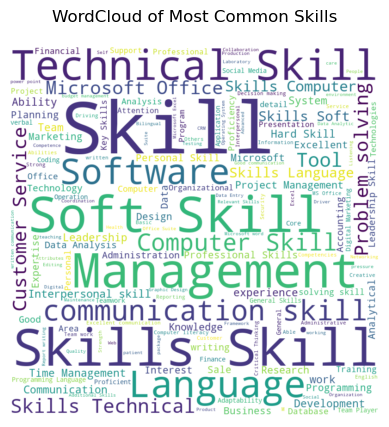

In [182]:
# Filter out NULL values in the 'SKILL' column
skills = df_combined['SKILL'].astype(str)
skills = skills[skills != 'nan']

# Show the wordcloud for the non-NULL values in the 'SKILL' column
text_keys = ' '.join(skills.values)
wordcloud_keys = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text_keys)
plt.imshow(wordcloud_keys, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Most Common Skills\n')
plt.show()


#### WordCloud of Most Common Skills description

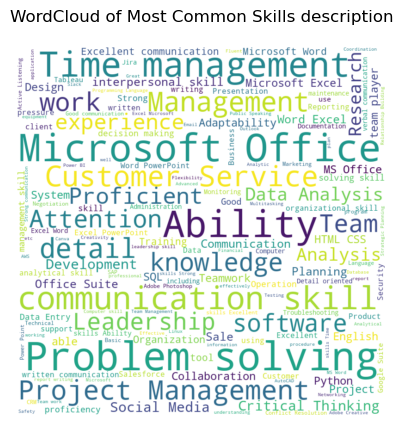

In [183]:
# Filter out NULL values in the 'SKILL' column
skills_description = df_combined['SKILL_DESCRIPTION'].astype(str)
skills_description = skills_description[skills_description != 'nan']

# Show the wordcloud for the non-NULL values in the 'SKILL' column
text_keys = ' '.join(skills_description.values)
wordcloud_keys = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text_keys)
plt.imshow(wordcloud_keys, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Most Common Skills description\n')
plt.show()


### EDUCATION COLUMN SPLIT

In [184]:
# EDUCATION COLUMN SPLIT
print('\033[1mEducation Column Split:\n' + '='*23 + '\033[0m')
edu_dicts = []

for index, row in df_combined.iterrows():
    edu_dict = {}
    for dictionary in row['EDUCATION']:
        for k, v in dictionary.items():
            edu_dict[k] = v
    edu_dicts.append(edu_dict)

df_edu = pd.DataFrame(edu_dicts)

# Convert column headers to uppercase and add prefix
df_edu = df_edu.rename(columns=lambda x: 'EDU_' + str(x).upper())

display(df_edu)

Education Column Split:


,EDU_GPA,EDU_MINOR,EDU_AWARDS,EDU_SCHOOL,EDU_PROGRAM,EDU_VISIBLE,EDU_LOCATION,EDU_COURSEWORK,EDU_GRADUATIONDATE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,,,Cardinal Otunga high school Mosocho,Kenya certificate of secondary education,True,Kisii,,December 2011
2,Pass,Certificate in Automotive Engineering,Certificate in automotive engineering,Technial University of Mombasa,Automotive Engineering,True,"Mombasa, Kenya",,November 2011
3,,,Attained 363 marks in KCPE,WERUS ACADEMY,Primary Education,True,EMBU,Completed primary school education,November 2012
4,,,,University of Nairobi,Bachelor of Microbiology and Biotechnology,True,Nairobi,"Vertebrate zoology, Invertebrate zoology, fund...",September 2020
...,...,...,...,...,...,...,...,...,...
13193,,,,Boston University,Bachelor in Sociology,True,,,May 2022
13194,,,,College of Dupage,Associates in Arts,True,"Glen Ellyn, Illinois",,May 2023
13195,3.4,,,Rocky Bayou Christian High School,,True,"Shalimar, Florida",,
13196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Note: For NA values in Gradution Date we are considering 2000-01-01

In [185]:
import datetime
import numpy as np

# Replace non-finite values with a default date
df_edu['EDU_GRADUATIONDATE'].fillna(pd.to_datetime('2000-01-01'), inplace=True)

# Convert 'graduationDate' column to datetime format
df_edu['EDU_GRADUATIONDATE'] = pd.to_datetime(df_edu['EDU_GRADUATIONDATE'], format='%B %Y', errors='coerce')

# Replace NaT (non-finite values) with a default date
df_edu['EDU_GRADUATIONDATE'].fillna(pd.to_datetime('2000-01-01'), inplace=True)

# Extract the year into a 'GRAD_YEAR' column
df_edu['EDU_GRAD_YEAR'] = df_edu['EDU_GRADUATIONDATE'].dt.year.astype(float).astype(int)

# Display the updated DataFrame
display(df_edu)


,EDU_GPA,EDU_MINOR,EDU_AWARDS,EDU_SCHOOL,EDU_PROGRAM,EDU_VISIBLE,EDU_LOCATION,EDU_COURSEWORK,EDU_GRADUATIONDATE,EDU_GRAD_YEAR
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-01,2000
1,,,,Cardinal Otunga high school Mosocho,Kenya certificate of secondary education,True,Kisii,,2011-12-01,2011
2,Pass,Certificate in Automotive Engineering,Certificate in automotive engineering,Technial University of Mombasa,Automotive Engineering,True,"Mombasa, Kenya",,2011-11-01,2011
3,,,Attained 363 marks in KCPE,WERUS ACADEMY,Primary Education,True,EMBU,Completed primary school education,2012-11-01,2012
4,,,,University of Nairobi,Bachelor of Microbiology and Biotechnology,True,Nairobi,"Vertebrate zoology, Invertebrate zoology, fund...",2020-09-01,2020
...,...,...,...,...,...,...,...,...,...,...
13193,,,,Boston University,Bachelor in Sociology,True,,,2022-05-01,2022
13194,,,,College of Dupage,Associates in Arts,True,"Glen Ellyn, Illinois",,2023-05-01,2023
13195,3.4,,,Rocky Bayou Christian High School,,True,"Shalimar, Florida",,2000-01-01,2000
13196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-01,2000


In [186]:
df_edu.EDU_GRAD_YEAR.unique()

array([2000, 2011, 2012, 2020, 2005, 2017, 2022, 2023, 2024, 2018, 2002,
       2025, 2019, 2021, 2016, 2014, 2013, 2010, 2015, 2009, 2007, 2006,
       2003, 2008, 1996, 2004, 2027, 2026, 2001, 1990, 1999, 1995, 2028,
       1991, 2030, 1997, 1998, 1994, 1986, 1977, 1988, 1989, 1993, 1981,
       1984, 1992])

#### To calculate the expected age accurately, we need to consider the birth year instead. Since we don't have the birth year information in the provided DataFrame, we can make an assumption that most individuals graduate from high school or college around the age of 18 to 22.

In [187]:
import datetime

# Calculate the current year
current_year = datetime.datetime.now().year

# Define the age range assumptions
MIN_GRAD_AGE = 18
MAX_GRAD_AGE = 22

# Calculate the birth year
df_edu['BIRTH_YEAR'] = df_edu['EDU_GRAD_YEAR'] - MAX_GRAD_AGE

# Calculate the age range
df_edu['AGE_EXPECTED'] = current_year - df_edu['BIRTH_YEAR']

df_edu.columns = df_edu.columns.str.upper()

# Display the DataFrame with the age range
display(df_edu)

,EDU_GPA,EDU_MINOR,EDU_AWARDS,EDU_SCHOOL,EDU_PROGRAM,EDU_VISIBLE,EDU_LOCATION,EDU_COURSEWORK,EDU_GRADUATIONDATE,EDU_GRAD_YEAR,BIRTH_YEAR,AGE_EXPECTED
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-01,2000,1978,45
1,,,,Cardinal Otunga high school Mosocho,Kenya certificate of secondary education,True,Kisii,,2011-12-01,2011,1989,34
2,Pass,Certificate in Automotive Engineering,Certificate in automotive engineering,Technial University of Mombasa,Automotive Engineering,True,"Mombasa, Kenya",,2011-11-01,2011,1989,34
3,,,Attained 363 marks in KCPE,WERUS ACADEMY,Primary Education,True,EMBU,Completed primary school education,2012-11-01,2012,1990,33
4,,,,University of Nairobi,Bachelor of Microbiology and Biotechnology,True,Nairobi,"Vertebrate zoology, Invertebrate zoology, fund...",2020-09-01,2020,1998,25
...,...,...,...,...,...,...,...,...,...,...,...,...
13193,,,,Boston University,Bachelor in Sociology,True,,,2022-05-01,2022,2000,23
13194,,,,College of Dupage,Associates in Arts,True,"Glen Ellyn, Illinois",,2023-05-01,2023,2001,22
13195,3.4,,,Rocky Bayou Christian High School,,True,"Shalimar, Florida",,2000-01-01,2000,1978,45
13196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-01,2000,1978,45


In [188]:
# Combine the DataFrames
df_combined_2 = pd.concat([df_combined, df_edu], axis=1)

# Drop the specified columns
df_combined_2 = df_combined_2.drop(['EDUCATION'], axis=1)

# Display the updated DataFrame
display(df_combined_2)

,ID,AWARDS,ROLE,CITY,STATE,SUMMARY,PROJECTS,VOLUNTEER,EXPERIENCE,REFERENCES,...,EDU_AWARDS,EDU_SCHOOL,EDU_PROGRAM,EDU_VISIBLE,EDU_LOCATION,EDU_COURSEWORK,EDU_GRADUATIONDATE,EDU_GRAD_YEAR,BIRTH_YEAR,AGE_EXPECTED
0,clezbskz2000ryi2yj9sgidax,[],,algiers / hussein dey,algiers,,[],[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-01,2000,1978,45
1,clezeac8k001myg2u6yph9yz0,[],,kisii,,organized and dependable candidate successfull...,[],"[{'title': 'ICT assistant ', 'endDate': 'Decem...","[{'title': 'Intern ', 'company': 'Ministry of ...",[],...,,Cardinal Otunga high school Mosocho,Kenya certificate of secondary education,True,Kisii,,2011-12-01,2011,1989,34
2,clezh9pxu0185yp2yo6ztscpf,[],,nairobi,nairobi,taking on challenging opportunities to meet my...,[],[],"[{'title': 'Admin in charge', 'company': 'Plan...",[],...,Certificate in automotive engineering,Technial University of Mombasa,Automotive Engineering,True,"Mombasa, Kenya",,2011-11-01,2011,1989,34
3,clf06bf5b014dx22ur1bph3sd,[],,nairobi,,ambitious student eager to contribute to team ...,[],[],"[{'title': 'SURVEY OF KENYA Attachee', 'compan...",[],...,Attained 363 marks in KCPE,WERUS ACADEMY,Primary Education,True,EMBU,Completed primary school education,2012-11-01,2012,1990,33
4,clezdavhy000eyg2uh55ycnb4,[],,machakos,machakos,quality control analyst with 1 year of experie...,[],[],"[{'title': 'Quality Control Analyst', 'company...",[],...,,University of Nairobi,Bachelor of Microbiology and Biotechnology,True,Nairobi,"Vertebrate zoology, Invertebrate zoology, fund...",2020-09-01,2020,1998,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,clbmqeb0p00bowy50puy0zh47,[],,,,,[],[],"[{'title': 'Counselor', 'company': 'Camp Micah...",[],...,,Boston University,Bachelor in Sociology,True,,,2022-05-01,2022,2000,23
13194,cld9mmcjj004mx32l3q1bn6ju,[],,naperville,il,passionate business student with 8+ years of e...,[],[],"[{'title': 'Rehabilitation Technician', 'compa...",[],...,,College of Dupage,Associates in Arts,True,"Glen Ellyn, Illinois",,2023-05-01,2023,2001,22
13195,cld8csfqd002yyc2m1l7vqsuv,[],,orlando,florida,knowledgeable customer service agent with driv...,[],[],"[{'title': 'Server', 'company': 'Sonny's', 'en...",[],...,,Rocky Bayou Christian High School,,True,"Shalimar, Florida",,2000-01-01,2000,1978,45
13196,clelqs1nd0002x12vg9vjumyg,[],,alberta beach,alberta,,[],[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-01,2000,1978,45


In [189]:
display(df_combined_2.columns)

Index(['ID', 'AWARDS', 'ROLE', 'CITY', 'STATE', 'SUMMARY', 'PROJECTS',
       'VOLUNTEER', 'EXPERIENCE', 'REFERENCES', 'PUBLICATIONS',
       'CERTIFICATIONS', 'ACCOMPLISHMENTS', 'COUNTRY_CODE',
       'SKILL_DESCRIPTION', 'SKILL', 'EDU_GPA', 'EDU_MINOR', 'EDU_AWARDS',
       'EDU_SCHOOL', 'EDU_PROGRAM', 'EDU_VISIBLE', 'EDU_LOCATION',
       'EDU_COURSEWORK', 'EDU_GRADUATIONDATE', 'EDU_GRAD_YEAR', 'BIRTH_YEAR',
       'AGE_EXPECTED'],
      dtype='object')

### VOLUNTEER COLUMN SPLIT

In [190]:
# VOLUNTEER COLUMN SPLIT
print('\033[1mVOLUNTEER Column Split:\n' + '='*23 + '\033[0m')
vol_dicts = []

for index, row in df_combined_2.iterrows():
    vol_dict = {}
    for dictionary in row['VOLUNTEER']:
        for k, v in dictionary.items():
            vol_dict[k] = v
    vol_dicts.append(vol_dict)

df_vol = pd.DataFrame(vol_dicts)

# Convert column headers to uppercase and add prefix
df_vol = df_vol.rename(columns=lambda x: 'VLNTR_' + str(x).upper())

display(df_vol)


VOLUNTEER Column Split:


,VLNTR_TITLE,VLNTR_ENDDATE,VLNTR_VISIBLE,VLNTR_LOCATION,VLNTR_STARTDATE,VLNTR_DESCRIPTION,VLNTR_ORGANIZATION
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,,True,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13196,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
# Combine the DataFrames
df_combined_3 = pd.concat([df_combined_2, df_vol], axis=1)

# Drop the specified columns
df_combined_3 = df_combined_3.drop(['VOLUNTEER'], axis=1)

# Display the updated DataFrame
display(df_combined_3)

,ID,AWARDS,ROLE,CITY,STATE,SUMMARY,PROJECTS,EXPERIENCE,REFERENCES,PUBLICATIONS,...,EDU_GRAD_YEAR,BIRTH_YEAR,AGE_EXPECTED,VLNTR_TITLE,VLNTR_ENDDATE,VLNTR_VISIBLE,VLNTR_LOCATION,VLNTR_STARTDATE,VLNTR_DESCRIPTION,VLNTR_ORGANIZATION
0,clezbskz2000ryi2yj9sgidax,[],,algiers / hussein dey,algiers,,[],[],[],[],...,2000,1978,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,clezeac8k001myg2u6yph9yz0,[],,kisii,,organized and dependable candidate successfull...,[],"[{'title': 'Intern ', 'company': 'Ministry of ...",[],[],...,2011,1989,34,,,True,,,,
2,clezh9pxu0185yp2yo6ztscpf,[],,nairobi,nairobi,taking on challenging opportunities to meet my...,[],"[{'title': 'Admin in charge', 'company': 'Plan...",[],[],...,2011,1989,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,clf06bf5b014dx22ur1bph3sd,[],,nairobi,,ambitious student eager to contribute to team ...,[],"[{'title': 'SURVEY OF KENYA Attachee', 'compan...",[],[],...,2012,1990,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,clezdavhy000eyg2uh55ycnb4,[],,machakos,machakos,quality control analyst with 1 year of experie...,[],"[{'title': 'Quality Control Analyst', 'company...",[],[],...,2020,1998,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,clbmqeb0p00bowy50puy0zh47,[],,,,,[],"[{'title': 'Counselor', 'company': 'Camp Micah...",[],[],...,2022,2000,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13194,cld9mmcjj004mx32l3q1bn6ju,[],,naperville,il,passionate business student with 8+ years of e...,[],"[{'title': 'Rehabilitation Technician', 'compa...",[],[],...,2023,2001,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13195,cld8csfqd002yyc2m1l7vqsuv,[],,orlando,florida,knowledgeable customer service agent with driv...,[],"[{'title': 'Server', 'company': 'Sonny's', 'en...",[],[],...,2000,1978,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13196,clelqs1nd0002x12vg9vjumyg,[],,alberta beach,alberta,,[],[],[],[],...,2000,1978,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
display(df_combined_3.columns)

Index(['ID', 'AWARDS', 'ROLE', 'CITY', 'STATE', 'SUMMARY', 'PROJECTS',
       'EXPERIENCE', 'REFERENCES', 'PUBLICATIONS', 'CERTIFICATIONS',
       'ACCOMPLISHMENTS', 'COUNTRY_CODE', 'SKILL_DESCRIPTION', 'SKILL',
       'EDU_GPA', 'EDU_MINOR', 'EDU_AWARDS', 'EDU_SCHOOL', 'EDU_PROGRAM',
       'EDU_VISIBLE', 'EDU_LOCATION', 'EDU_COURSEWORK', 'EDU_GRADUATIONDATE',
       'EDU_GRAD_YEAR', 'BIRTH_YEAR', 'AGE_EXPECTED', 'VLNTR_TITLE',
       'VLNTR_ENDDATE', 'VLNTR_VISIBLE', 'VLNTR_LOCATION', 'VLNTR_STARTDATE',
       'VLNTR_DESCRIPTION', 'VLNTR_ORGANIZATION'],
      dtype='object')

### EXPERIENCE COLUMN SPLIT

In [193]:
# EXPERIENCE COLUMN SPLIT
print('\033[1mEXPERIENCE Column Split:\n' + '='*23 + '\033[0m')
exp_dicts = []

for index, row in df_combined_3.iterrows():
    exp_dict = {}
    for dictionary in row['EXPERIENCE']:
        for k, v in dictionary.items():
            exp_dict[k] = v
    exp_dicts.append(exp_dict)

df_exp = pd.DataFrame(exp_dicts)

# Convert column headers to uppercase and add prefix
df_exp = df_exp.rename(columns=lambda x: 'EXP_' + str(x).upper())

display(df_exp)


EXPERIENCE Column Split:


,EXP_TITLE,EXP_COMPANY,EXP_ENDDATE,EXP_VISIBLE,EXP_LOCATION,EXP_STARTDATE,EXP_DESCRIPTION
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sales associate,Orange Telecommution company,August 2015,True,Nairobi,May 2015,• Customer service i.e. Demonstrate products t...
2,Head Cashier,Ebony Capital Ltd & Ufanisi Co-operative Ltd,September 2009,True,"Nakuru, Kenya",February 2009,• Receiving loan payments whether in form of ...
3,Geographic Information System Intern,MAPINFOTEK GEOMATIKS LIMITED,July 2019,True,Nairobi,May 2019,• Developed and maintained courteous and effec...
4,Teacher,Matungulu Junior Academy,August 2015,True,Matungulu,January 2015,• Roles and responsibilities;\n\n• \tPlanning ...
...,...,...,...,...,...,...,...
13193,Counselor,Camp Micah,August 2021,True,,June 2018,• coordinator \n• child development \n• Music ...
13194,Receptionist/Banquet Server,Cress Creek Country Club,February 2020,True,"Naperville, Illinois",August 2015,• Facilitated coordination and logistical plan...
13195,Customer Success Manager,Haverty's,December 2018,True,Shalimar,January 2017,• Led process improvement and problem-solving ...
13196,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
# Combine the DataFrames
df_combined_4 = pd.concat([df_combined_3, df_exp], axis=1)

# Drop the specified columns
df_combined_4 = df_combined_4.drop(['EXPERIENCE'], axis=1)

# Display the updated DataFrame
display(df_combined_4)

,ID,AWARDS,ROLE,CITY,STATE,SUMMARY,PROJECTS,REFERENCES,PUBLICATIONS,CERTIFICATIONS,...,VLNTR_STARTDATE,VLNTR_DESCRIPTION,VLNTR_ORGANIZATION,EXP_TITLE,EXP_COMPANY,EXP_ENDDATE,EXP_VISIBLE,EXP_LOCATION,EXP_STARTDATE,EXP_DESCRIPTION
0,clezbskz2000ryi2yj9sgidax,[],,algiers / hussein dey,algiers,,[],[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,clezeac8k001myg2u6yph9yz0,[],,kisii,,organized and dependable candidate successfull...,[],[],[],[],...,,,,Sales associate,Orange Telecommution company,August 2015,True,Nairobi,May 2015,• Customer service i.e. Demonstrate products t...
2,clezh9pxu0185yp2yo6ztscpf,[],,nairobi,nairobi,taking on challenging opportunities to meet my...,[],[],[],"[{'name': 'First Aid at Work', 'issuer': 'St J...",...,NaN,NaN,NaN,Head Cashier,Ebony Capital Ltd & Ufanisi Co-operative Ltd,September 2009,True,"Nakuru, Kenya",February 2009,• Receiving loan payments whether in form of ...
3,clf06bf5b014dx22ur1bph3sd,[],,nairobi,,ambitious student eager to contribute to team ...,[],[],[],[],...,NaN,NaN,NaN,Geographic Information System Intern,MAPINFOTEK GEOMATIKS LIMITED,July 2019,True,Nairobi,May 2019,• Developed and maintained courteous and effec...
4,clezdavhy000eyg2uh55ycnb4,[],,machakos,machakos,quality control analyst with 1 year of experie...,[],[],[],[{'name': 'Certificate in Computer Application...,...,NaN,NaN,NaN,Teacher,Matungulu Junior Academy,August 2015,True,Matungulu,January 2015,• Roles and responsibilities;\n\n• \tPlanning ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,clbmqeb0p00bowy50puy0zh47,[],,,,,[],[],[],[],...,NaN,NaN,NaN,Counselor,Camp Micah,August 2021,True,,June 2018,• coordinator \n• child development \n• Music ...
13194,cld9mmcjj004mx32l3q1bn6ju,[],,naperville,il,passionate business student with 8+ years of e...,[],[],[],[],...,NaN,NaN,NaN,Receptionist/Banquet Server,Cress Creek Country Club,February 2020,True,"Naperville, Illinois",August 2015,• Facilitated coordination and logistical plan...
13195,cld8csfqd002yyc2m1l7vqsuv,[],,orlando,florida,knowledgeable customer service agent with driv...,[],[],[],[],...,NaN,NaN,NaN,Customer Success Manager,Haverty's,December 2018,True,Shalimar,January 2017,• Led process improvement and problem-solving ...
13196,clelqs1nd0002x12vg9vjumyg,[],,alberta beach,alberta,,[],[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
display(df_combined_4.columns)

Index(['ID', 'AWARDS', 'ROLE', 'CITY', 'STATE', 'SUMMARY', 'PROJECTS',
       'REFERENCES', 'PUBLICATIONS', 'CERTIFICATIONS', 'ACCOMPLISHMENTS',
       'COUNTRY_CODE', 'SKILL_DESCRIPTION', 'SKILL', 'EDU_GPA', 'EDU_MINOR',
       'EDU_AWARDS', 'EDU_SCHOOL', 'EDU_PROGRAM', 'EDU_VISIBLE',
       'EDU_LOCATION', 'EDU_COURSEWORK', 'EDU_GRADUATIONDATE', 'EDU_GRAD_YEAR',
       'BIRTH_YEAR', 'AGE_EXPECTED', 'VLNTR_TITLE', 'VLNTR_ENDDATE',
       'VLNTR_VISIBLE', 'VLNTR_LOCATION', 'VLNTR_STARTDATE',
       'VLNTR_DESCRIPTION', 'VLNTR_ORGANIZATION', 'EXP_TITLE', 'EXP_COMPANY',
       'EXP_ENDDATE', 'EXP_VISIBLE', 'EXP_LOCATION', 'EXP_STARTDATE',
       'EXP_DESCRIPTION'],
      dtype='object')

### PROJECTS COLUMN SPLIT

In [196]:
# PROJECTS COLUMN SPLIT
print('\033[1mPROJECTS Column Split:\n' + '='*23 + '\033[0m')
prj_dicts = []

for index, row in df_combined_4.iterrows():
    prj_dict = {}
    for dictionary in row['PROJECTS']:
        for k, v in dictionary.items():
            prj_dict[k] = v
    prj_dicts.append(prj_dict)

df_prj = pd.DataFrame(prj_dicts)

####
# Convert column headers to uppercase and add prefix
df_prj = df_prj.rename(columns=lambda x: 'PRJ_' + str(x).upper())

#display(df_prj)

# Combine the DataFrames
df_combined_5 = pd.concat([df_combined_4, df_prj], axis=1)

# Drop the specified columns
df_combined_5 = df_combined_5.drop(['PROJECTS'], axis=1)

# Display the updated DataFrame
display(df_combined_5)
######
display(df_combined_5.columns)

PROJECTS Column Split:


,ID,AWARDS,ROLE,CITY,STATE,SUMMARY,REFERENCES,PUBLICATIONS,CERTIFICATIONS,ACCOMPLISHMENTS,...,EXP_LOCATION,EXP_STARTDATE,EXP_DESCRIPTION,PRJ_LINK,PRJ_TITLE,PRJ_SKILLS,PRJ_ENDDATE,PRJ_VISIBLE,PRJ_STARTDATE,PRJ_DESCRIPTION
0,clezbskz2000ryi2yj9sgidax,[],,algiers / hussein dey,algiers,,[],[],[],,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,clezeac8k001myg2u6yph9yz0,[],,kisii,,organized and dependable candidate successfull...,[],[],[],,...,Nairobi,May 2015,• Customer service i.e. Demonstrate products t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,clezh9pxu0185yp2yo6ztscpf,[],,nairobi,nairobi,taking on challenging opportunities to meet my...,[],[],"[{'name': 'First Aid at Work', 'issuer': 'St J...",,...,"Nakuru, Kenya",February 2009,• Receiving loan payments whether in form of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,clf06bf5b014dx22ur1bph3sd,[],,nairobi,,ambitious student eager to contribute to team ...,[],[],[],,...,Nairobi,May 2019,• Developed and maintained courteous and effec...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,clezdavhy000eyg2uh55ycnb4,[],,machakos,machakos,quality control analyst with 1 year of experie...,[],[],[{'name': 'Certificate in Computer Application...,,...,Matungulu,January 2015,• Roles and responsibilities;\n\n• \tPlanning ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,clbmqeb0p00bowy50puy0zh47,[],,,,,[],[],[],,...,,June 2018,• coordinator \n• child development \n• Music ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13194,cld9mmcjj004mx32l3q1bn6ju,[],,naperville,il,passionate business student with 8+ years of e...,[],[],[],,...,"Naperville, Illinois",August 2015,• Facilitated coordination and logistical plan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13195,cld8csfqd002yyc2m1l7vqsuv,[],,orlando,florida,knowledgeable customer service agent with driv...,[],[],[],,...,Shalimar,January 2017,• Led process improvement and problem-solving ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13196,clelqs1nd0002x12vg9vjumyg,[],,alberta beach,alberta,,[],[],[],,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['ID', 'AWARDS', 'ROLE', 'CITY', 'STATE', 'SUMMARY', 'REFERENCES',
       'PUBLICATIONS', 'CERTIFICATIONS', 'ACCOMPLISHMENTS', 'COUNTRY_CODE',
       'SKILL_DESCRIPTION', 'SKILL', 'EDU_GPA', 'EDU_MINOR', 'EDU_AWARDS',
       'EDU_SCHOOL', 'EDU_PROGRAM', 'EDU_VISIBLE', 'EDU_LOCATION',
       'EDU_COURSEWORK', 'EDU_GRADUATIONDATE', 'EDU_GRAD_YEAR', 'BIRTH_YEAR',
       'AGE_EXPECTED', 'VLNTR_TITLE', 'VLNTR_ENDDATE', 'VLNTR_VISIBLE',
       'VLNTR_LOCATION', 'VLNTR_STARTDATE', 'VLNTR_DESCRIPTION',
       'VLNTR_ORGANIZATION', 'EXP_TITLE', 'EXP_COMPANY', 'EXP_ENDDATE',
       'EXP_VISIBLE', 'EXP_LOCATION', 'EXP_STARTDATE', 'EXP_DESCRIPTION',
       'PRJ_LINK', 'PRJ_TITLE', 'PRJ_SKILLS', 'PRJ_ENDDATE', 'PRJ_VISIBLE',
       'PRJ_STARTDATE', 'PRJ_DESCRIPTION'],
      dtype='object')

### REFERENCES COLUMN SPLIT

In [197]:
# REFERENCES COLUMN SPLIT
print('\033[1mREFERENCES Column Split:\n' + '='*23 + '\033[0m')
ref_dicts = []

for index, row in df_combined_5.iterrows():
    ref_dict = {}
    for dictionary in row['REFERENCES']:
        for k, v in dictionary.items():
            ref_dict[k] = v
    ref_dicts.append(ref_dict)

df_ref = pd.DataFrame(ref_dicts)

####
# Convert column headers to uppercase and add prefix
df_ref = df_ref.rename(columns=lambda x: 'REF_' + str(x).upper())

#display(df_prj)

# Combine the DataFrames
df_combined_6 = pd.concat([df_combined_5, df_ref], axis=1)

# Drop the specified columns
df_combined_6 = df_combined_6.drop(['REFERENCES'], axis=1)

# Display the updated DataFrame
display(df_combined_6)
######
display(df_combined_6.columns)

REFERENCES Column Split:


,ID,AWARDS,ROLE,CITY,STATE,SUMMARY,PUBLICATIONS,CERTIFICATIONS,ACCOMPLISHMENTS,COUNTRY_CODE,...,PRJ_SKILLS,PRJ_ENDDATE,PRJ_VISIBLE,PRJ_STARTDATE,PRJ_DESCRIPTION,REF_NAME,REF_EMAIL,REF_VISIBLE,REF_PHONENUMBER,REF_RELATIONSHIP
0,clezbskz2000ryi2yj9sgidax,[],,algiers / hussein dey,algiers,,[],[],,DZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,clezeac8k001myg2u6yph9yz0,[],,kisii,,organized and dependable candidate successfull...,[],[],,KE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,clezh9pxu0185yp2yo6ztscpf,[],,nairobi,nairobi,taking on challenging opportunities to meet my...,[],"[{'name': 'First Aid at Work', 'issuer': 'St J...",,KE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,clf06bf5b014dx22ur1bph3sd,[],,nairobi,,ambitious student eager to contribute to team ...,[],[],,KE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,clezdavhy000eyg2uh55ycnb4,[],,machakos,machakos,quality control analyst with 1 year of experie...,[],[{'name': 'Certificate in Computer Application...,,KE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,clbmqeb0p00bowy50puy0zh47,[],,,,,[],[],,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13194,cld9mmcjj004mx32l3q1bn6ju,[],,naperville,il,passionate business student with 8+ years of e...,[],[],,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13195,cld8csfqd002yyc2m1l7vqsuv,[],,orlando,florida,knowledgeable customer service agent with driv...,[],[],,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13196,clelqs1nd0002x12vg9vjumyg,[],,alberta beach,alberta,,[],[],,CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['ID', 'AWARDS', 'ROLE', 'CITY', 'STATE', 'SUMMARY', 'PUBLICATIONS',
       'CERTIFICATIONS', 'ACCOMPLISHMENTS', 'COUNTRY_CODE',
       'SKILL_DESCRIPTION', 'SKILL', 'EDU_GPA', 'EDU_MINOR', 'EDU_AWARDS',
       'EDU_SCHOOL', 'EDU_PROGRAM', 'EDU_VISIBLE', 'EDU_LOCATION',
       'EDU_COURSEWORK', 'EDU_GRADUATIONDATE', 'EDU_GRAD_YEAR', 'BIRTH_YEAR',
       'AGE_EXPECTED', 'VLNTR_TITLE', 'VLNTR_ENDDATE', 'VLNTR_VISIBLE',
       'VLNTR_LOCATION', 'VLNTR_STARTDATE', 'VLNTR_DESCRIPTION',
       'VLNTR_ORGANIZATION', 'EXP_TITLE', 'EXP_COMPANY', 'EXP_ENDDATE',
       'EXP_VISIBLE', 'EXP_LOCATION', 'EXP_STARTDATE', 'EXP_DESCRIPTION',
       'PRJ_LINK', 'PRJ_TITLE', 'PRJ_SKILLS', 'PRJ_ENDDATE', 'PRJ_VISIBLE',
       'PRJ_STARTDATE', 'PRJ_DESCRIPTION', 'REF_NAME', 'REF_EMAIL',
       'REF_VISIBLE', 'REF_PHONENUMBER', 'REF_RELATIONSHIP'],
      dtype='object')

### PUBLICATIONS COLUMN SPLIT

In [198]:
# PUBLICATIONS COLUMN SPLIT
print('\033[1mPUBLICATIONS Column Split:\n' + '='*26 + '\033[0m')
pbl_dicts = []

for index, row in df_combined_6.iterrows():
    pbl_dict = {}
    for dictionary in row['PUBLICATIONS']:
        for k, v in dictionary.items():
            pbl_dict[k] = v
    pbl_dicts.append(pbl_dict)

df_pbl = pd.DataFrame(pbl_dicts)

####
# Convert column headers to uppercase and add prefix
df_pbl = df_pbl.rename(columns=lambda x: 'PBL_' + str(x).upper())

#display(df_pbl)

# Combine the DataFrames
df_combined_7 = pd.concat([df_combined_6, df_pbl], axis=1)

# Drop the specified columns
df_combined_7 = df_combined_7.drop(['PUBLICATIONS'], axis=1)

# Display the updated DataFrame
display(df_combined_7)
######
display(df_combined_7.columns)

PUBLICATIONS Column Split:


,ID,AWARDS,ROLE,CITY,STATE,SUMMARY,CERTIFICATIONS,ACCOMPLISHMENTS,COUNTRY_CODE,SKILL_DESCRIPTION,...,REF_EMAIL,REF_VISIBLE,REF_PHONENUMBER,REF_RELATIONSHIP,PBL_DATE,PBL_LINK,PBL_NAME,PBL_DETAILS,PBL_VISIBLE,PBL_PUBLISHER
0,clezbskz2000ryi2yj9sgidax,[],,algiers / hussein dey,algiers,,[],,DZ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,clezeac8k001myg2u6yph9yz0,[],,kisii,,organized and dependable candidate successfull...,[],,KE,Staff leadership and supervision\nHelp desk op...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,clezh9pxu0185yp2yo6ztscpf,[],,nairobi,nairobi,taking on challenging opportunities to meet my...,"[{'name': 'First Aid at Work', 'issuer': 'St J...",,KE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,clf06bf5b014dx22ur1bph3sd,[],,nairobi,,ambitious student eager to contribute to team ...,[],,KE,"Proficient in ArcGIS Desktop, Knowledge of Arc...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,clezdavhy000eyg2uh55ycnb4,[],,machakos,machakos,quality control analyst with 1 year of experie...,[{'name': 'Certificate in Computer Application...,,KE,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,clbmqeb0p00bowy50puy0zh47,[],,,,,[],,GB,"Microsoft Office, Collaboration, Child Develop...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13194,cld9mmcjj004mx32l3q1bn6ju,[],,naperville,il,passionate business student with 8+ years of e...,[],,US,"Microsoft Office, LIMS (Laboratory Information...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13195,cld8csfqd002yyc2m1l7vqsuv,[],,orlando,florida,knowledgeable customer service agent with driv...,[],,US,Able to adjust quickly and efficiently to new ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13196,clelqs1nd0002x12vg9vjumyg,[],,alberta beach,alberta,,[],,CA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['ID', 'AWARDS', 'ROLE', 'CITY', 'STATE', 'SUMMARY', 'CERTIFICATIONS',
       'ACCOMPLISHMENTS', 'COUNTRY_CODE', 'SKILL_DESCRIPTION', 'SKILL',
       'EDU_GPA', 'EDU_MINOR', 'EDU_AWARDS', 'EDU_SCHOOL', 'EDU_PROGRAM',
       'EDU_VISIBLE', 'EDU_LOCATION', 'EDU_COURSEWORK', 'EDU_GRADUATIONDATE',
       'EDU_GRAD_YEAR', 'BIRTH_YEAR', 'AGE_EXPECTED', 'VLNTR_TITLE',
       'VLNTR_ENDDATE', 'VLNTR_VISIBLE', 'VLNTR_LOCATION', 'VLNTR_STARTDATE',
       'VLNTR_DESCRIPTION', 'VLNTR_ORGANIZATION', 'EXP_TITLE', 'EXP_COMPANY',
       'EXP_ENDDATE', 'EXP_VISIBLE', 'EXP_LOCATION', 'EXP_STARTDATE',
       'EXP_DESCRIPTION', 'PRJ_LINK', 'PRJ_TITLE', 'PRJ_SKILLS', 'PRJ_ENDDATE',
       'PRJ_VISIBLE', 'PRJ_STARTDATE', 'PRJ_DESCRIPTION', 'REF_NAME',
       'REF_EMAIL', 'REF_VISIBLE', 'REF_PHONENUMBER', 'REF_RELATIONSHIP',
       'PBL_DATE', 'PBL_LINK', 'PBL_NAME', 'PBL_DETAILS', 'PBL_VISIBLE',
       'PBL_PUBLISHER'],
      dtype='object')

### CERTIFICATIONS COLUMN SPLIT

In [199]:
# CERTIFICATIONS COLUMN SPLIT
print('\033[1mCERTIFICATIONS Column Split:\n' + '='*28 + '\033[0m')
crt_dicts = []

for index, row in df_combined_7.iterrows():
    crt_dict = {}
    for dictionary in row['CERTIFICATIONS']:
        for k, v in dictionary.items():
            crt_dict[k] = v
    crt_dicts.append(crt_dict)

df_crt = pd.DataFrame(crt_dicts)

####
# Convert column headers to uppercase and add prefix
df_crt = df_crt.rename(columns=lambda x: 'CRT_' + str(x).upper())

#display(df_pbl)

# Combine the DataFrames
df_combined_8 = pd.concat([df_combined_7, df_crt], axis=1)

# Drop the specified columns
df_combined_8 = df_combined_8.drop(['CERTIFICATIONS'], axis=1)

# Display the updated DataFrame
display(df_combined_8)
######
display(df_combined_8.columns)

CERTIFICATIONS Column Split:


,ID,AWARDS,ROLE,CITY,STATE,SUMMARY,ACCOMPLISHMENTS,COUNTRY_CODE,SKILL_DESCRIPTION,SKILL,...,PBL_DATE,PBL_LINK,PBL_NAME,PBL_DETAILS,PBL_VISIBLE,PBL_PUBLISHER,CRT_NAME,CRT_ISSUER,CRT_VISIBLE,CRT_DATERECEIVED
0,clezbskz2000ryi2yj9sgidax,[],,algiers / hussein dey,algiers,,,DZ,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,clezeac8k001myg2u6yph9yz0,[],,kisii,,organized and dependable candidate successfull...,,KE,Staff leadership and supervision\nHelp desk op...,Organizational and technical skills,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,clezh9pxu0185yp2yo6ztscpf,[],,nairobi,nairobi,taking on challenging opportunities to meet my...,,KE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IELT's,British Council,True,October 2022
3,clf06bf5b014dx22ur1bph3sd,[],,nairobi,,ambitious student eager to contribute to team ...,,KE,"Proficient in ArcGIS Desktop, Knowledge of Arc...",SOFTWARES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,clezdavhy000eyg2uh55ycnb4,[],,machakos,machakos,quality control analyst with 1 year of experie...,,KE,,,...,NaN,NaN,NaN,NaN,NaN,NaN,Certificate in Computer Applications,Kenya Institute of Computer Science and Techno...,True,May 2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,clbmqeb0p00bowy50puy0zh47,[],,,,,,GB,"Microsoft Office, Collaboration, Child Develop...",Skills,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13194,cld9mmcjj004mx32l3q1bn6ju,[],,naperville,il,passionate business student with 8+ years of e...,,US,"Microsoft Office, LIMS (Laboratory Information...",Computer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13195,cld8csfqd002yyc2m1l7vqsuv,[],,orlando,florida,knowledgeable customer service agent with driv...,,US,Able to adjust quickly and efficiently to new ...,Adaptable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13196,clelqs1nd0002x12vg9vjumyg,[],,alberta beach,alberta,,,CA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['ID', 'AWARDS', 'ROLE', 'CITY', 'STATE', 'SUMMARY', 'ACCOMPLISHMENTS',
       'COUNTRY_CODE', 'SKILL_DESCRIPTION', 'SKILL', 'EDU_GPA', 'EDU_MINOR',
       'EDU_AWARDS', 'EDU_SCHOOL', 'EDU_PROGRAM', 'EDU_VISIBLE',
       'EDU_LOCATION', 'EDU_COURSEWORK', 'EDU_GRADUATIONDATE', 'EDU_GRAD_YEAR',
       'BIRTH_YEAR', 'AGE_EXPECTED', 'VLNTR_TITLE', 'VLNTR_ENDDATE',
       'VLNTR_VISIBLE', 'VLNTR_LOCATION', 'VLNTR_STARTDATE',
       'VLNTR_DESCRIPTION', 'VLNTR_ORGANIZATION', 'EXP_TITLE', 'EXP_COMPANY',
       'EXP_ENDDATE', 'EXP_VISIBLE', 'EXP_LOCATION', 'EXP_STARTDATE',
       'EXP_DESCRIPTION', 'PRJ_LINK', 'PRJ_TITLE', 'PRJ_SKILLS', 'PRJ_ENDDATE',
       'PRJ_VISIBLE', 'PRJ_STARTDATE', 'PRJ_DESCRIPTION', 'REF_NAME',
       'REF_EMAIL', 'REF_VISIBLE', 'REF_PHONENUMBER', 'REF_RELATIONSHIP',
       'PBL_DATE', 'PBL_LINK', 'PBL_NAME', 'PBL_DETAILS', 'PBL_VISIBLE',
       'PBL_PUBLISHER', 'CRT_NAME', 'CRT_ISSUER', 'CRT_VISIBLE',
       'CRT_DATERECEIVED'],
      dtype='object')

#### AWARDS COLUMN SPLIT

In [200]:
# AWARDS COLUMN SPLIT
print('\033[1mAWARDS Column Split:\n' + '='*20 + '\033[0m')
awd_dicts = []

for index, row in df_combined_8.iterrows():
    awd_dict = {}
    for dictionary in row['AWARDS']:
        for k, v in dictionary.items():
            awd_dict[k] = v
    awd_dicts.append(awd_dict)

df_awd = pd.DataFrame(awd_dicts)

####
# Convert column headers to uppercase and add prefix
df_awd = df_awd.rename(columns=lambda x: 'AWD_' + str(x).upper())

#display(df_pbl)

# Combine the DataFrames
df_combined_9 = pd.concat([df_combined_8, df_awd], axis=1)

# Drop the specified columns
df_combined_9 = df_combined_9.drop(['AWARDS'], axis=1)

# Display the updated DataFrame
display(df_combined_9)
######
display(df_combined_9.columns)

AWARDS Column Split:


,ID,ROLE,CITY,STATE,SUMMARY,ACCOMPLISHMENTS,COUNTRY_CODE,SKILL_DESCRIPTION,SKILL,EDU_GPA,...,CRT_NAME,CRT_ISSUER,CRT_VISIBLE,CRT_DATERECEIVED,AWD_NAME,AWD_ISSUER,AWD_DETAILS,AWD_VISIBLE,AWD_DESCRIPTION,AWD_DATERECEIVED
0,clezbskz2000ryi2yj9sgidax,,algiers / hussein dey,algiers,,,DZ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,clezeac8k001myg2u6yph9yz0,,kisii,,organized and dependable candidate successfull...,,KE,Staff leadership and supervision\nHelp desk op...,Organizational and technical skills,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,clezh9pxu0185yp2yo6ztscpf,,nairobi,nairobi,taking on challenging opportunities to meet my...,,KE,NaN,NaN,Pass,...,IELT's,British Council,True,October 2022,NaN,NaN,NaN,NaN,NaN,NaN
3,clf06bf5b014dx22ur1bph3sd,,nairobi,,ambitious student eager to contribute to team ...,,KE,"Proficient in ArcGIS Desktop, Knowledge of Arc...",SOFTWARES,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,clezdavhy000eyg2uh55ycnb4,,machakos,machakos,quality control analyst with 1 year of experie...,,KE,,,,...,Certificate in Computer Applications,Kenya Institute of Computer Science and Techno...,True,May 2011,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,clbmqeb0p00bowy50puy0zh47,,,,,,GB,"Microsoft Office, Collaboration, Child Develop...",Skills,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13194,cld9mmcjj004mx32l3q1bn6ju,,naperville,il,passionate business student with 8+ years of e...,,US,"Microsoft Office, LIMS (Laboratory Information...",Computer,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13195,cld8csfqd002yyc2m1l7vqsuv,,orlando,florida,knowledgeable customer service agent with driv...,,US,Able to adjust quickly and efficiently to new ...,Adaptable,3.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13196,clelqs1nd0002x12vg9vjumyg,,alberta beach,alberta,,,CA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['ID', 'ROLE', 'CITY', 'STATE', 'SUMMARY', 'ACCOMPLISHMENTS',
       'COUNTRY_CODE', 'SKILL_DESCRIPTION', 'SKILL', 'EDU_GPA', 'EDU_MINOR',
       'EDU_AWARDS', 'EDU_SCHOOL', 'EDU_PROGRAM', 'EDU_VISIBLE',
       'EDU_LOCATION', 'EDU_COURSEWORK', 'EDU_GRADUATIONDATE', 'EDU_GRAD_YEAR',
       'BIRTH_YEAR', 'AGE_EXPECTED', 'VLNTR_TITLE', 'VLNTR_ENDDATE',
       'VLNTR_VISIBLE', 'VLNTR_LOCATION', 'VLNTR_STARTDATE',
       'VLNTR_DESCRIPTION', 'VLNTR_ORGANIZATION', 'EXP_TITLE', 'EXP_COMPANY',
       'EXP_ENDDATE', 'EXP_VISIBLE', 'EXP_LOCATION', 'EXP_STARTDATE',
       'EXP_DESCRIPTION', 'PRJ_LINK', 'PRJ_TITLE', 'PRJ_SKILLS', 'PRJ_ENDDATE',
       'PRJ_VISIBLE', 'PRJ_STARTDATE', 'PRJ_DESCRIPTION', 'REF_NAME',
       'REF_EMAIL', 'REF_VISIBLE', 'REF_PHONENUMBER', 'REF_RELATIONSHIP',
       'PBL_DATE', 'PBL_LINK', 'PBL_NAME', 'PBL_DETAILS', 'PBL_VISIBLE',
       'PBL_PUBLISHER', 'CRT_NAME', 'CRT_ISSUER', 'CRT_VISIBLE',
       'CRT_DATERECEIVED', 'AWD_NAME', 'AWD_ISSUER', 'AWD_DETAILS',
  

### Final Dataset cleanup

In [201]:
import pandas as pd
import numpy as np

df = df_combined_9

# Drop columns ending with "_VISIBLE"
df = df.drop(df.filter(regex='_VISIBLE$').columns, axis=1)

date_columns = ['VLNTR_ENDDATE', 'VLNTR_STARTDATE', 'EXP_ENDDATE', 'EXP_STARTDATE', 'PRJ_ENDDATE', 'PRJ_STARTDATE', 'PBL_DATE', 'CRT_DATERECEIVED', 'AWD_DATERECEIVED']

# Convert the specified columns to datetime format with the appropriate format string
for column in date_columns:
    df[column] = pd.to_datetime(df[column], format='%B %Y', errors='coerce')

# Convert all values in all columns to uppercase
df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

# Display the updated DataFrame
display(df)


,ID,ROLE,CITY,STATE,SUMMARY,ACCOMPLISHMENTS,COUNTRY_CODE,SKILL_DESCRIPTION,SKILL,EDU_GPA,...,PBL_DETAILS,PBL_PUBLISHER,CRT_NAME,CRT_ISSUER,CRT_DATERECEIVED,AWD_NAME,AWD_ISSUER,AWD_DETAILS,AWD_DESCRIPTION,AWD_DATERECEIVED
0,CLEZBSKZ2000RYI2YJ9SGIDAX,,ALGIERS / HUSSEIN DEY,ALGIERS,,,DZ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
1,CLEZEAC8K001MYG2U6YPH9YZ0,,KISII,,ORGANIZED AND DEPENDABLE CANDIDATE SUCCESSFULL...,,KE,STAFF LEADERSHIP AND SUPERVISION\nHELP DESK OP...,ORGANIZATIONAL AND TECHNICAL SKILLS,,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
2,CLEZH9PXU0185YP2YO6ZTSCPF,,NAIROBI,NAIROBI,TAKING ON CHALLENGING OPPORTUNITIES TO MEET MY...,,KE,NaN,NaN,PASS,...,NaN,NaN,IELT'S,BRITISH COUNCIL,2022-10-01,NaN,NaN,NaN,NaN,NaT
3,CLF06BF5B014DX22UR1BPH3SD,,NAIROBI,,AMBITIOUS STUDENT EAGER TO CONTRIBUTE TO TEAM ...,,KE,"PROFICIENT IN ARCGIS DESKTOP, KNOWLEDGE OF ARC...",SOFTWARES,,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
4,CLEZDAVHY000EYG2UH55YCNB4,,MACHAKOS,MACHAKOS,QUALITY CONTROL ANALYST WITH 1 YEAR OF EXPERIE...,,KE,,,,...,NaN,NaN,CERTIFICATE IN COMPUTER APPLICATIONS,KENYA INSTITUTE OF COMPUTER SCIENCE AND TECHNO...,2011-05-01,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,CLBMQEB0P00BOWY50PUY0ZH47,,,,,,GB,"MICROSOFT OFFICE, COLLABORATION, CHILD DEVELOP...",SKILLS,,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
13194,CLD9MMCJJ004MX32L3Q1BN6JU,,NAPERVILLE,IL,PASSIONATE BUSINESS STUDENT WITH 8+ YEARS OF E...,,US,"MICROSOFT OFFICE, LIMS (LABORATORY INFORMATION...",COMPUTER,,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
13195,CLD8CSFQD002YYC2M1L7VQSUV,,ORLANDO,FLORIDA,KNOWLEDGEABLE CUSTOMER SERVICE AGENT WITH DRIV...,,US,ABLE TO ADJUST QUICKLY AND EFFICIENTLY TO NEW ...,ADAPTABLE,3.4,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
13196,CLELQS1ND0002X12VG9VJUMYG,,ALBERTA BEACH,ALBERTA,,,CA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT


In [202]:
# import pandas as pd
# import numpy as np

# df = df_combined_9

# #Drop columns ending with "_VISIBLE"
# df = df.drop(df.filter(regex='_VISIBLE$').columns, axis=1)

# date_columns = ['VLNTR_ENDDATE', 'VLNTR_STARTDATE', 'EXP_ENDDATE', 'EXP_STARTDATE', 'PRJ_ENDDATE', 'PRJ_STARTDATE', 'PBL_DATE', 'CRT_DATERECEIVED','AWD_DATERECEIVED']

# # Specify additional columns to convert to datetime format and replace non-finite values with default dates
# df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, format='%d/%m/%Y', errors='coerce')).fillna(pd.to_datetime('2000-01-01'))

# # Convert all values in all columns to uppercase
# df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

# # Display the updated DataFrame
# display(df)


In [203]:
df.dtypes

ID                            object
ROLE                          object
CITY                          object
STATE                         object
SUMMARY                       object
ACCOMPLISHMENTS               object
COUNTRY_CODE                  object
SKILL_DESCRIPTION             object
SKILL                         object
EDU_GPA                       object
EDU_MINOR                     object
EDU_AWARDS                    object
EDU_SCHOOL                    object
EDU_PROGRAM                   object
EDU_LOCATION                  object
EDU_COURSEWORK                object
EDU_GRADUATIONDATE    datetime64[ns]
EDU_GRAD_YEAR                  int64
BIRTH_YEAR                     int64
AGE_EXPECTED                   int64
VLNTR_TITLE                   object
VLNTR_ENDDATE         datetime64[ns]
VLNTR_LOCATION                object
VLNTR_STARTDATE       datetime64[ns]
VLNTR_DESCRIPTION             object
VLNTR_ORGANIZATION            object
EXP_TITLE                     object
E

## Research Questions
1. What are the three industries that the majority of CoverQuick's users apply to ?
2. Discover trends in demographics and find which industries yield the best and the worst resumes (CoverQuick provides metrics for defining a "Good" resume). 
3. Determine the approximate age range and experience level.
4. Determine trends in experience and skills for these target users.

### Determine the approximate age range and experience level.

In [204]:
exp_columns = df.columns[df.columns.str.startswith('EXP_')]
display(df[exp_columns])

,EXP_TITLE,EXP_COMPANY,EXP_ENDDATE,EXP_LOCATION,EXP_STARTDATE,EXP_DESCRIPTION
0,NaN,NaN,NaT,NaN,NaT,NaN
1,SALES ASSOCIATE,ORANGE TELECOMMUTION COMPANY,2015-08-01,NAIROBI,2015-05-01,• CUSTOMER SERVICE I.E. DEMONSTRATE PRODUCTS T...
2,HEAD CASHIER,EBONY CAPITAL LTD & UFANISI CO-OPERATIVE LTD,2009-09-01,"NAKURU, KENYA",2009-02-01,• RECEIVING LOAN PAYMENTS WHETHER IN FORM OF ...
3,GEOGRAPHIC INFORMATION SYSTEM INTERN,MAPINFOTEK GEOMATIKS LIMITED,2019-07-01,NAIROBI,2019-05-01,• DEVELOPED AND MAINTAINED COURTEOUS AND EFFEC...
4,TEACHER,MATUNGULU JUNIOR ACADEMY,2015-08-01,MATUNGULU,2015-01-01,• ROLES AND RESPONSIBILITIES;\n\n• \tPLANNING ...
...,...,...,...,...,...,...
13193,COUNSELOR,CAMP MICAH,2021-08-01,,2018-06-01,• COORDINATOR \n• CHILD DEVELOPMENT \n• MUSIC ...
13194,RECEPTIONIST/BANQUET SERVER,CRESS CREEK COUNTRY CLUB,2020-02-01,"NAPERVILLE, ILLINOIS",2015-08-01,• FACILITATED COORDINATION AND LOGISTICAL PLAN...
13195,CUSTOMER SUCCESS MANAGER,HAVERTY'S,2018-12-01,SHALIMAR,2017-01-01,• LED PROCESS IMPROVEMENT AND PROBLEM-SOLVING ...
13196,NaN,NaN,NaT,NaN,NaT,NaN


In [205]:
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud

# # Combine all the values from the "EXP_COMPANY" column into a single string
# text = ' '.join(df['EXP_TITLE'].dropna())

# # Generate the word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# # Create a figure and axes
# fig, ax = plt.subplots(figsize=(10, 6))

# # Display the word cloud
# ax.imshow(wordcloud, interpolation='bilinear')
# ax.axis('off')

# # Add a title to the word cloud
# ax.set_title('Word Cloud for EXP_TITLE', fontsize=16)

# plt.show()


In [206]:
import datetime

# Calculate the duration of experience in days
df['EXP_DURATION'] = (df['EXP_ENDDATE'] - df['EXP_STARTDATE']).dt.days

# Define the experience level categories in days
levels = {
    'BEGINNER': 365,
    'INTERMEDIATE': 730,
    'ADVANCED': 1095,
}

# Categorize the experience levels based on the duration
df['EXP_LEVEL'] = pd.cut(df['EXP_DURATION'], bins=[-np.inf] + list(levels.values()), labels=list(levels.keys()))

# Display the DataFrame with the experience level column
display(df[['EXP_STARTDATE', 'EXP_ENDDATE', 'EXP_DURATION', 'EXP_LEVEL']])


,EXP_STARTDATE,EXP_ENDDATE,EXP_DURATION,EXP_LEVEL
0,NaT,NaT,NaN,NaN
1,2015-05-01,2015-08-01,92.0,BEGINNER
2,2009-02-01,2009-09-01,212.0,BEGINNER
3,2019-05-01,2019-07-01,61.0,BEGINNER
4,2015-01-01,2015-08-01,212.0,BEGINNER
...,...,...,...,...
13193,2018-06-01,2021-08-01,1157.0,NaN
13194,2015-08-01,2020-02-01,1645.0,NaN
13195,2017-01-01,2018-12-01,699.0,INTERMEDIATE
13196,NaT,NaT,NaN,NaN


In [207]:
print('\033[1mDetermine the expected age and experience level:\n' + '='*58 + '\033[0m')

display(df[['ID', 'COUNTRY_CODE', 'BIRTH_YEAR', 'AGE_EXPECTED', 'EXP_DURATION', 'EXP_LEVEL']])

Determine the expected age and experience level:


,ID,COUNTRY_CODE,BIRTH_YEAR,AGE_EXPECTED,EXP_DURATION,EXP_LEVEL
0,CLEZBSKZ2000RYI2YJ9SGIDAX,DZ,1978,45,NaN,NaN
1,CLEZEAC8K001MYG2U6YPH9YZ0,KE,1989,34,92.0,BEGINNER
2,CLEZH9PXU0185YP2YO6ZTSCPF,KE,1989,34,212.0,BEGINNER
3,CLF06BF5B014DX22UR1BPH3SD,KE,1990,33,61.0,BEGINNER
4,CLEZDAVHY000EYG2UH55YCNB4,KE,1998,25,212.0,BEGINNER
...,...,...,...,...,...,...
13193,CLBMQEB0P00BOWY50PUY0ZH47,GB,2000,23,1157.0,NaN
13194,CLD9MMCJJ004MX32L3Q1BN6JU,US,2001,22,1645.0,NaN
13195,CLD8CSFQD002YYC2M1L7VQSUV,US,1978,45,699.0,INTERMEDIATE
13196,CLELQS1ND0002X12VG9VJUMYG,CA,1978,45,NaN,NaN


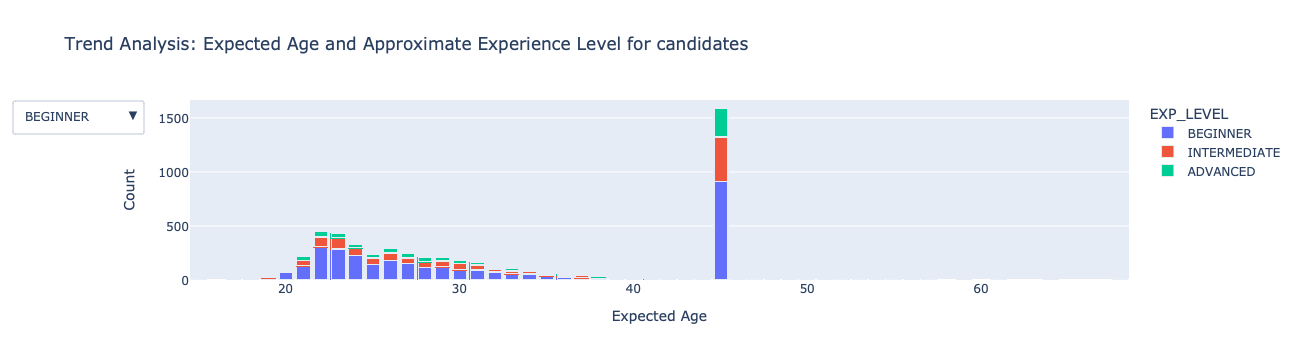

In [208]:
import plotly.graph_objects as go
import plotly.express as px

# Compute the count of each combination
df_count = df.groupby(['AGE_EXPECTED', 'EXP_LEVEL']).size().reset_index(name='Count')

# Create a stacked bar chart
fig = px.bar(df_count, x='AGE_EXPECTED', y='Count', color='EXP_LEVEL',
             title='Trend Analysis: Expected Age and Approximate Experience Level for candidates',
             labels={'AGE_EXPECTED': 'Expected Age', 'Count': 'Count'},
             category_orders={'AGE_EXPECTED': ['18-24', '25-34', '35-44', '45-54', '55+']},
             hover_data={'EXP_LEVEL': True, 'Count': ':y'},
             barmode='stack')

# Configure hover text format
fig.update_traces(hovertemplate='Expected Age: %{x}<br>' +
                                'Experience Level: %{customdata[0]}<br>' +
                                'Count: %{y}')

# Add dropdown menu to select experience levels
buttons = []
for level in df_count['EXP_LEVEL'].unique():
    visible = [True if l == level else False for l in df_count['EXP_LEVEL']]
    buttons.append(dict(label=level,
                        method='update',
                        args=[{'visible': visible}, {'title': f'Trend Analysis: Age Range and Experience Level - {level}'}]))

updatemenus = [{'active': 0, 'buttons': buttons}]

fig.update_layout(updatemenus=updatemenus)

# Show the figure
fig.show()


### Determine trends in experience and skills for these target users.
Bar chart to show the top 10 most common experiences and skills:

In [209]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import pandas as pd
import numpy as np

# Remove null, empty, and whitespace values from EXP_COMPANY column
cleaned_df = df[df['EXP_COMPANY'].notnull() & (df['EXP_COMPANY'].str.strip() != '')]

# Sort COUNTRY_CODE values in alphabetical order
country_codes_sorted = sorted(cleaned_df['COUNTRY_CODE'].unique())

# Define a function to update the bar chart and print top skills and experiences based on the selected country
def update_chart(country_code):
    filtered_df = df[df['COUNTRY_CODE'] == country_code]

    # Top 10 most common experiences (excluding null values and empty/whitespace titles)
    filtered_experiences = filtered_df['EXP_TITLE'].dropna().str.strip().replace('', np.nan)
    top_experiences = filtered_experiences.value_counts().nlargest(10)

    # Define custom colors for each bar based on the country
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'olive', 'cyan']

    plt.figure(figsize=(12, 6))
    top_experiences.plot(kind='bar', color=colors)
    plt.title(f'Top 10 Most Common Experiences - {country_code}')
    plt.xlabel('Experience Title')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    add_hover_text(top_experiences)
    plt.show()

    # Top 10 most common skills (excluding null values and empty/whitespace skills)
    filtered_skills = filtered_df['SKILL'].dropna().str.strip().replace('', np.nan)
    top_skills = filtered_skills.value_counts().nlargest(10)

    plt.figure(figsize=(12, 6))
    top_skills.plot(kind='bar', color=colors)
    plt.title(f'Top 10 Most Common Skills - {country_code}')
    plt.xlabel('Skill')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    add_hover_text(top_skills)  # Add hover text with counts
    plt.show()

    # Print top skills and experiences in tabular format
    top_skills_df = pd.DataFrame({'Skill': top_skills.index, 'Count': top_skills.values})
    top_experiences_df = pd.DataFrame({'Experience': top_experiences.index, 'Count': top_experiences.values})
    print('Top 10 Most Common Skills:')
    print(top_skills_df.to_string(index=False))
    print('\nTop 10 Most Common Experiences:')
    print(top_experiences_df.to_string(index=False))

def add_hover_text(series):
    # Add hover text with counts
    for i, count in enumerate(series.values):
        if not pd.isnull(count):
            plt.text(i, count, str(count), ha='center', va='bottom')

# Dropdown menu for country selection
country_dropdown = widgets.Dropdown(
    options=country_codes_sorted,
    value=country_codes_sorted[0],
    description='Country:',
    layout=widgets.Layout(width='200px')
)

# Use interact to dynamically update the chart based on the selected country
interact(update_chart, country_code=country_dropdown)


interactive(children=(Dropdown(description='Country:', layout=Layout(width='200px'), options=('AE', 'AI', 'AL'…

<function __main__.update_chart(country_code)>

### What are the three industries that the majority of CoverQuick's users apply to ?

In [210]:
# Remove null, empty, and whitespace values from EXP_COMPANY column
cleaned_df = df[df['EXP_COMPANY'].notnull() & (df['EXP_COMPANY'].str.strip() != '')]

# Count the occurrences of each experience title
experience_counts = cleaned_df['EXP_COMPANY'].value_counts()

# Get the top three experience titles with the highest counts
top_industries = experience_counts.nlargest(3)

# Print the top three industries
print("Top Three Industries:")
print(top_industries)


Top Three Industries:
FREELANCE                  33
AMAZON                     21
GHANA EDUCATION SERVICE    17
Name: EXP_COMPANY, dtype: int64


In [211]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Remove null, empty, and whitespace values from EXP_COMPANY column
cleaned_df = df[df['EXP_COMPANY'].notnull() & (df['EXP_COMPANY'].str.strip() != '')]

# Sort COUNTRY_CODE values in alphabetical order
country_codes_sorted = sorted(cleaned_df['COUNTRY_CODE'].unique())

# Define a function to update the bar chart based on the selected country
def update_chart(country_code):
    # Filter the data based on the selected country code
    filtered_df = cleaned_df[cleaned_df['COUNTRY_CODE'] == country_code]

    # Count the occurrences of each experience title
    experience_counts = filtered_df['EXP_COMPANY'].value_counts()

    # Get the top three experience titles with the highest counts
    top_industries = experience_counts.nlargest(3)

    # Generate custom colors for each bar
    colors = ['blue', 'green', 'red']

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    ax = top_industries.plot(kind='bar', color=colors)

    # Add counts to the bars
    for i, count in enumerate(top_industries.values):
        ax.text(i, count, str(count), ha='center', va='bottom')

    plt.title(f'Top Industries In {country_code} <=3')
    plt.xlabel('Industry')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

# Dropdown menu for country selection
country_dropdown = widgets.Dropdown(
    options=country_codes_sorted,
    value=country_codes_sorted[0],
    description='Country:',
    layout=widgets.Layout(width='200px')
)

# Use interact to dynamically update the chart based on the selected country
interact(update_chart, country_code=country_dropdown)


interactive(children=(Dropdown(description='Country:', layout=Layout(width='200px'), options=('AE', 'AI', 'AL'…

<function __main__.update_chart(country_code)>